In [3]:
import pandas as pd
import numpy as np
import os
from skimage.io import imshow, imread
import matplotlib.pyplot as plt
from patchify import patchify, unpatchify

In [4]:
TOP_DIR = '/home/groups/ChangLab/dataset/HMS-TMA-TNP/virtualIF'

In [5]:
TMA_PATH = f"{TOP_DIR}/TMATifs-010"

In [6]:
tif_paths = [f"{TMA_PATH}/{fname}" for fname in os.listdir(TMA_PATH)]

In [205]:
im = imread(tif_paths[0])
print(im.shape)

(40, 2672, 2672)


In [206]:
im.shape[1] / 668

4.0

In [207]:
patches = patchify(im, (40, 668, 668), step=668)

In [208]:
patches.shape

(1, 4, 4, 40, 668, 668)

In [209]:
patches = np.squeeze(patches)

In [210]:
patches.shape

(4, 4, 40, 668, 668)

In [224]:
def flatten_patches(patches):
    return np.reshape(patches, (patches.shape[0]**2, patches.shape[2], patches.shape[3], patches.shape[4]))

In [225]:
patches = flatten_patches(patches)

In [226]:
patches.shape

(16, 40, 668, 668)

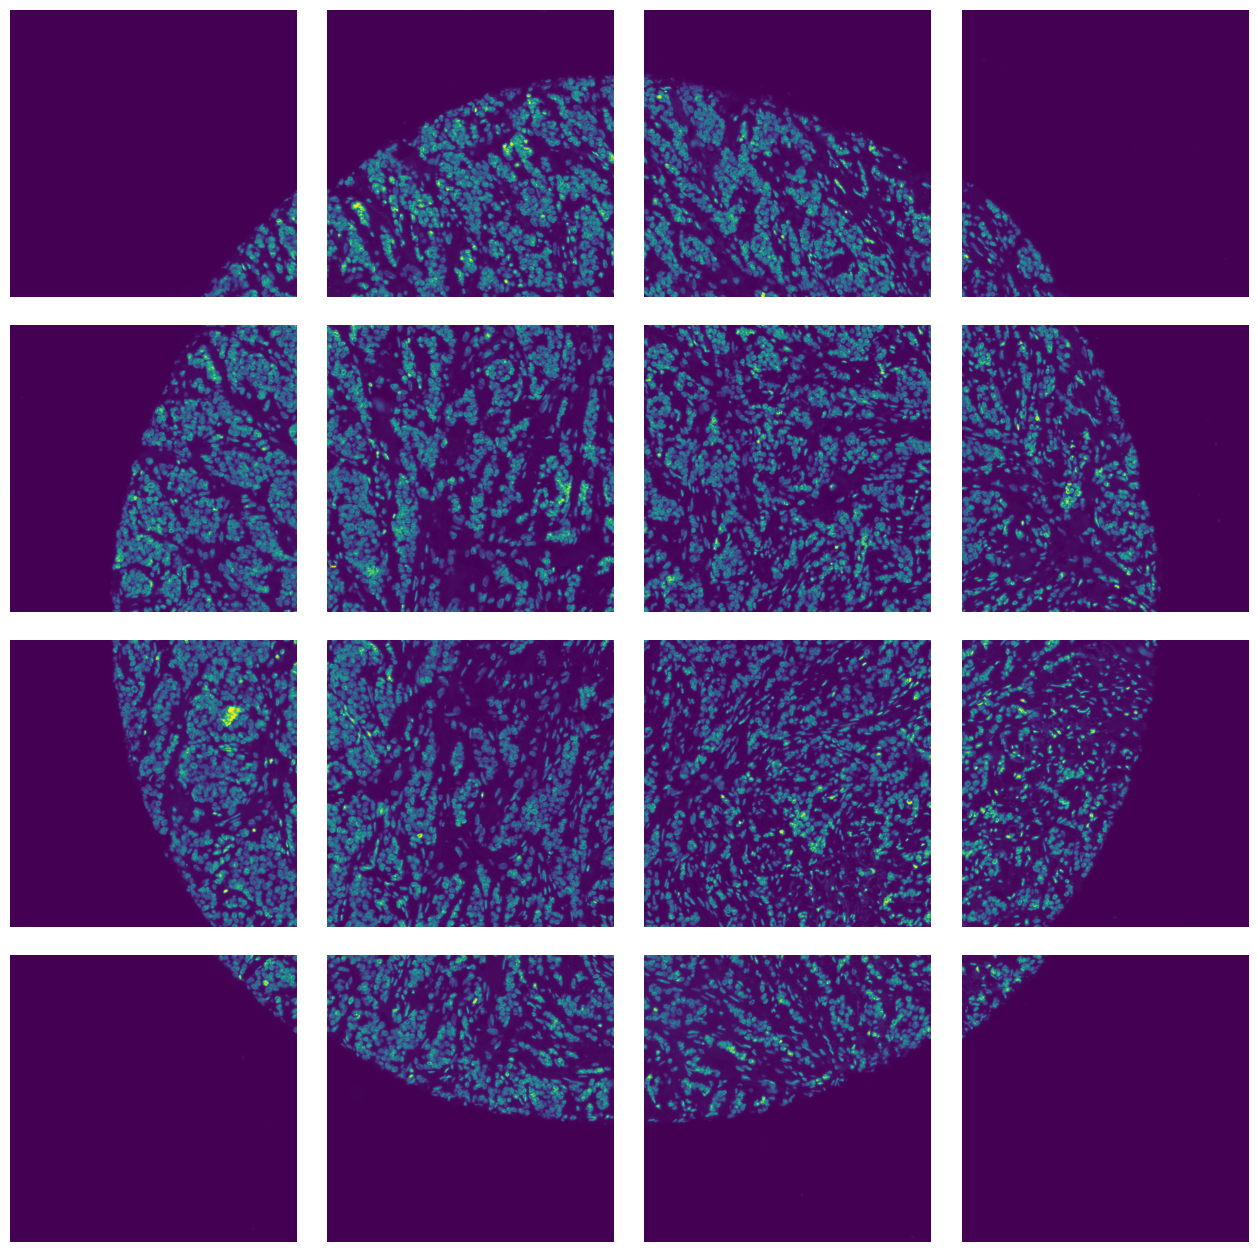

In [234]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(16,16)) # Notice the equal aspect ratio
gs1 = gridspec.GridSpec(4, 4)
gs1.update(wspace=0.1, hspace=0.1) # set the spacing between axes. 
for i in range(16):
    a = plt.subplot(gs1[i])
    a.axis('off')
    patch = patches[i]
    a.imshow(patch[0])
    a.set_aspect('equal')

In [241]:
def drop_and_shuffle(patch, num_drops=1, drop_channels=None):
    rand_idx = np.arange(0, len(patch))
    if drop_channels is None:
        drop_channels = np.random.randint(0, len(patch), size=num_drops)
    shuffle_idx = np.delete(channel_idx, drop_channels)
    np.random.shuffle(shuffle_idx)
    patch = patch[shuffle_idx,:,:]
    return patch
    
def channel_mix(patches, num_drops=1):
    mixed_patches = np.empty((patches.shape[0], patches.shape[1] - num_drops, patches.shape[2], patches.shape[3]))
    for i, patch in enumerate(patches):
        mixed_patches[i] = drop_and_shuffle(patch, num_drops=num_drops)
    return mixed_patches

In [242]:
mixed_patches = channel_mix(patches)

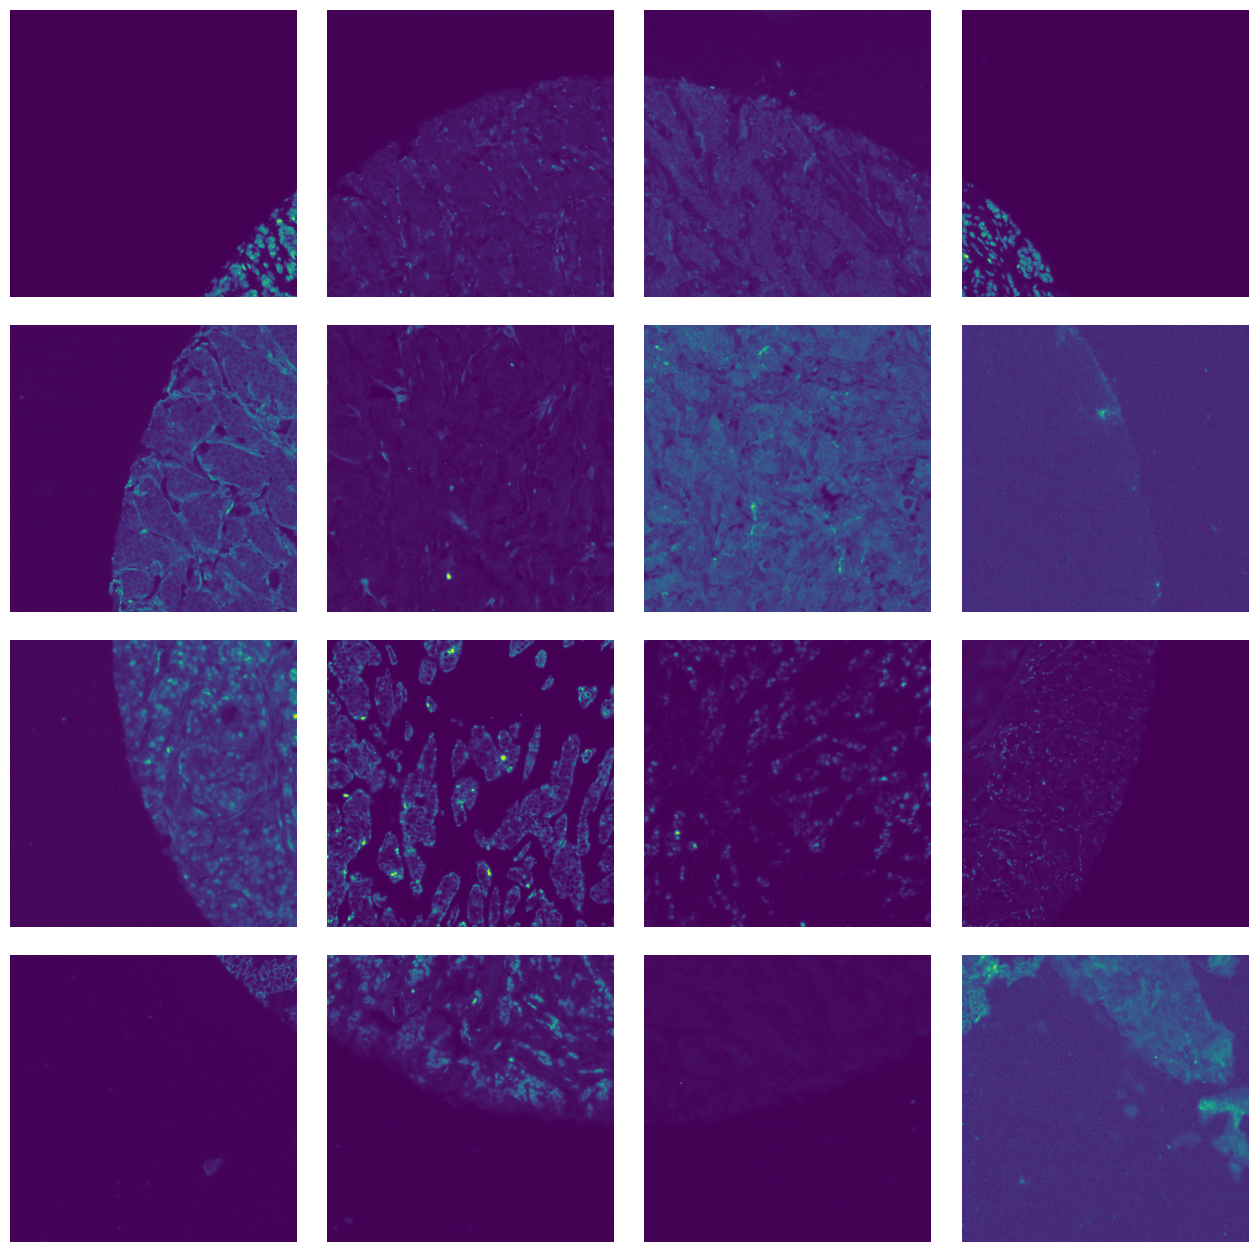

In [243]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(16,16)) # Notice the equal aspect ratio
gs1 = gridspec.GridSpec(4, 4)
gs1.update(wspace=0.1, hspace=0.1) # set the spacing between axes. 
for i in range(16):
    a = plt.subplot(gs1[i])
    a.axis('off')
    patch = mixed_patches[i]
    a.imshow(patch[0])
    a.set_aspect('equal')

In [244]:
mixed_patches.shape

(16, 39, 668, 668)

In [233]:
a = np.array([0,1,2,3])
np.delete(a, 1)

array([0, 2, 3])